# DISTORSION

In [1]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt



################ FIND CHESSBOARD CORNERS - OBJECT POINTS AND IMAGE POINTS #############################

chessboardSize = (7,7)
frameSize = (224,224)




# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)


# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0],0:chessboardSize[1]].T.reshape(-1,2)


# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


images = glob.glob('road_following_chessdistorted/apex/*.jpg')

for image in images:

    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
    

    # If found, add object points, image points (after refining them)
    if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)

        # Draw and display the corners
        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        plt.imshow(img)
        plt.show()


cv.destroyAllWindows()




############## CALIBRATION #######################################################

ret, cameraMatrix, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)



In [2]:
calibration_data = { "camera_matrix": cameraMatrix, "distortion_coefficient": dist }
print(calibration_data)

{'camera_matrix': array([[131.05242367,   0.        , 125.01475972],
       [  0.        , 226.89610289, 121.69248609],
       [  0.        ,   0.        ,   1.        ]]), 'distortion_coefficient': array([[-0.4644342 ,  0.70387215, -0.00353926, -0.01382612, -0.57886639]])}


In [3]:
############## UNDISTORTION #####################################################

img = cv.imread('road_following_CircuitRgbOK/apex/105_125_b77ac756-c9f3-11eb-bdd5-a0a4c55ef385.jpg',1)
h,  w = img.shape[:2]
#newCameraMatrix, roi = cv.getOptimalNewCameraMatrix(cameraMatrix, dist, (w,h), 1, (w,h))



# Undistort
udst = cv.undistort(img, cameraMatrix, dist, None, cameraMatrix)

# crop the image
#x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
cv.imwrite('undistorttest.jpg', udst)



# Undistort with Remapping
#mapx, mapy = cv.initUndistortRectifyMap(cameraMatrix, dist, None, newCameraMatrix, (w,h), 5)
#dst = cv.remap(img, mapx, mapy, cv.INTER_LINEAR)

# crop the image
#x, y, w, h = roi
#dst = dst[y:y+h, x:x+w]
#cv.imwrite('chess16Result2.jpg', dst)




# Reprojection Error
#mean_error = 0

#for i in range(len(objpoints)):
    #imgpoints2, _ = cv.projectPoints(objpoints[i], rvecs[i], tvecs[i], cameraMatrix, dist)
    #error = cv.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    #mean_error += error

#print( "total error: {}".format(mean_error/len(objpoints)) )

True

# WARP

In [13]:
src = np.float32([
    (0, 224), # bottom-left corner
    (60, 75), # top-left corner
    (170,75), # top-right corner
    (224, 224) # bottom-right corner
])

# Destination points are to be parallel, taking into account the image size
dst = np.float32([
    [50, 224],             # bottom-left corner
    [50, 0],                       # top-left corner
    [170, 0],           # top-right corner
    [170, 224]  # bottom-right corner
])

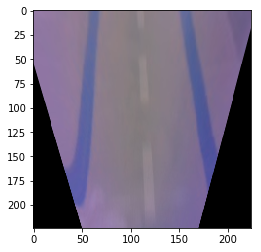

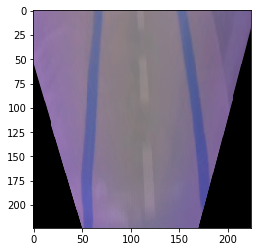

In [14]:
# Calculate the transformation matrix and it's inverse transformation
M = cv.getPerspectiveTransform(src, dst)
M_inv = cv.getPerspectiveTransform(dst, src)
warped_udst = cv.warpPerspective(udst, M, (224,224))
warped = cv.warpPerspective(img, M, (224,224))
plt.imshow(warped_udst)
plt.show()
plt.imshow(warped)
plt.show()

